# Import all important libraries

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gdcm
import pydicom as dicom
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Prediction using Clinical Info

In [44]:
#Importing the data
df_credit2 = pd.read_csv("C:/Users/hp/es_dump_data.csv")
df_credit1 = pd.read_csv("C:/Users/hp/es_dump_data.csv")
df_credit1.head()

,Row_number,ImageFile,Age,Sex,Positivity at admission,Temp_C,DaysFever,Cough,DifficultyInBreathing,Therapy_anti-inflammatory,...,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,Chronic Kidney disease,RespiratoryFailure,Position,Prognosis,Death
0,339,P_342.dcm,58,0,0,36.6,1,0,0,1,...,0,0,0,0,0,0,0,0,MILD,0
1,323,P_324.dcm,61,0,1,38.2,4,0,0,1,...,0,0,0,0,0,0,0,0,MILD,0
2,314,P_314.dcm,59,1,1,37.5,3,1,0,1,...,0,0,0,0,0,0,0,0,MILD,0
3,317,P_317.dcm,69,0,1,37.0,3,0,0,1,...,0,0,0,0,0,0,0,0,MILD,0
4,349,P_358.dcm,28,0,1,37.6,4,1,0,1,...,0,0,0,0,0,0,0,0,MILD,0


In [45]:
df_credit1=df_credit1.drop(['Row_number', 'ImageFile'],axis=1)
df_credit1.head()

,Age,Sex,Positivity at admission,Temp_C,DaysFever,Cough,DifficultyInBreathing,Therapy_anti-inflammatory,Therapy_Tocilizumab,Therapy_Anakinra,...,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,Chronic Kidney disease,RespiratoryFailure,Position,Prognosis,Death
0,58,0,0,36.6,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,MILD,0
1,61,0,1,38.2,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,MILD,0
2,59,1,1,37.5,3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,MILD,0
3,69,0,1,37.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,MILD,0
4,28,0,1,37.6,4,1,0,1,0,0,...,0,0,0,0,0,0,0,0,MILD,0


In [46]:
print(df_credit1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         378 non-null    int64  
 1   Sex                         378 non-null    int64  
 2   Positivity at admission     378 non-null    int64  
 3   Temp_C                      378 non-null    float64
 4   DaysFever                   378 non-null    int64  
 5   Cough                       378 non-null    int64  
 6   DifficultyInBreathing       378 non-null    int64  
 7   Therapy_anti-inflammatory   378 non-null    int64  
 8   Therapy_Tocilizumab         378 non-null    int64  
 9   Therapy_Anakinra            378 non-null    int64  
 10  Therapy_hydroxychloroquine  378 non-null    int64  
 11  Therapy_antiviral           378 non-null    int64  
 12  Therapy_Eparine             378 non-null    int64  
 13  WBC                         378 non

In [47]:
#Looking unique values
print(df_credit1.nunique())
#Looking the data
print(df_credit1.head())

Age                            65
Sex                             2
Positivity at admission         2
Temp_C                         41
DaysFever                       4
Cough                           2
DifficultyInBreathing           2
Therapy_anti-inflammatory       2
Therapy_Tocilizumab             2
Therapy_Anakinra                1
Therapy_hydroxychloroquine      2
Therapy_antiviral               2
Therapy_Eparine                 4
WBC                           287
RBC                           182
CRP                           349
Glucose                       118
PaO2                          212
PaCO2                         134
pH                             42
CardiovascularDisease           2
IschemicHeartDisease            2
AtrialFibrillation              2
HeartFailure                    2
Ictus                           2
HighBloodPressure               2
Diabetes                        2
Dementia                        2
BPCO                            2
Cancer        

In [48]:
df_credit1['Prognosis'].count()

378

In [49]:
df_credit1['Prognosis'].value_counts()

SEVERE    204
MILD      174
Name: Prognosis, dtype: int64

# Handling categorical data

In [50]:
# Map risk column good to 0 and bad to 1
df_credit1['Prognosis'] = df_credit1['Prognosis'].map({'SEVERE':1, 'MILD':0})

In [51]:
Prognosis=df_credit1['Prognosis']

df_credit=df_credit1.drop(['Prognosis'],axis=1)

# Split data into training and testing 

In [53]:
# Spliting data into train and test version
X_train, X_test, y_train, y_test = train_test_split(df_credit1, Prognosis, test_size = 0.30, random_state=42)

# Model Building

# SVM

In [54]:
from sklearn.svm import SVC
classif =SVC(kernel='linear')
classif.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
y_pred = classif.predict(X_test)
print('\nAccuracy of SVM on test set: {:.2f}'.format(accuracy_score(y_pred,y_test)))


Accuracy of SVM on test set: 1.00


In [59]:
confusion_matrix_SVM = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",confusion_matrix_knn)
#sns.heatmap(confusion_matrix_knn, annot=True)
confusion_matrix_SVM = pd.DataFrame(confusion_matrix_knn, index=['Mild','Severe'], columns=['Mild','Severe'])
confusion_matrix_SVM.head()

Confusion Matrix: 
         Mild  Severe
Mild      60       0
Severe     0      54


,Mild,Severe
Mild,60,0
Severe,0,54


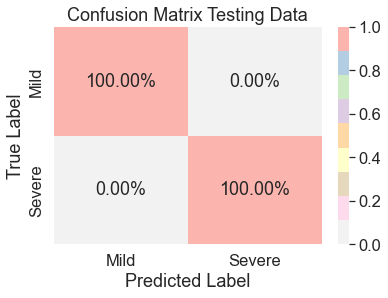

In [60]:
sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(confusion_matrix_SVM/np.sum(confusion_matrix_SVM), annot=True, 
            fmt='.2%', cmap='Pastel1_r')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title('Confusion Matrix Testing Data')
plt.show()

# KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
y_pred = classifier.predict(X_test)
print('\nAccuracy of K-nearest Neighbor classifier on test set: {:.2f}'.format(accuracy_score(y_pred,y_test)))


Accuracy of K-nearest Neighbor classifier on test set: 0.61


In [79]:
confusion_matrix_knn = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",confusion_matrix_knn)
#sns.heatmap(confusion_matrix_knn, annot=True)
confusion_matrix_knn = pd.DataFrame(confusion_matrix_knn, index=['Mild','Severe'], columns=['Mild','Severe'])
confusion_matrix_knn.head()

Confusion Matrix: 
 [[30 30]
 [15 39]]


,Mild,Severe
Mild,30,30
Severe,15,39


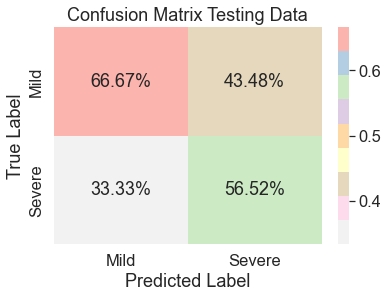

In [80]:
sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(confusion_matrix_knn/np.sum(confusion_matrix_knn), annot=True, 
            fmt='.2%', cmap='Pastel1_r')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title('Confusion Matrix Testing Data')
plt.show()

# Logistic Regression Model Fitting

In [81]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Predicting the test dataset results and calculating the accuracy

In [82]:
pred_y = logreg.predict(X_test)
probabilities=logreg.predict_proba(X_test)
print('\nAccuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#print(pred_y)
pred_y=np.where(pred_y > 0.5,1,0)


Accuracy of logistic regression classifier on test set: 0.70


# Confusion Matrix

In [83]:
confusion_matrix_logreg = confusion_matrix(y_test,pred_y)
print("Confusion Matrix: \n",confusion_matrix_logreg)
confusion_matrix_logreg = pd.DataFrame(confusion_matrix_logreg, index=['Mild','Severe'], columns=['Mild','Severe'])
confusion_matrix_logreg.head()

Confusion Matrix: 
 [[36 24]
 [10 44]]


,Mild,Severe
Mild,36,24
Severe,10,44


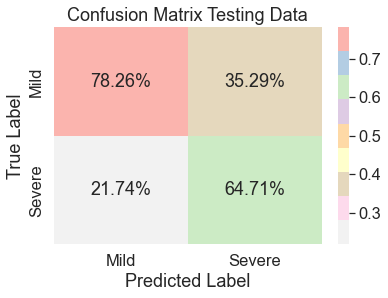

In [84]:
sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(confusion_matrix_logreg/np.sum(confusion_matrix_logreg), annot=True, 
            fmt='.2%', cmap='Pastel1_r')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title('Confusion Matrix Testing Data')
plt.show()

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68        60
           1       0.65      0.81      0.72        54

    accuracy                           0.70       114
   macro avg       0.71      0.71      0.70       114
weighted avg       0.72      0.70      0.70       114

